In [3]:
import pandas as pd

In [4]:
from sqlalchemy import create_engine, MetaData, Table, select, engine

In [5]:
!pip install pymysql
    

#### Connect to mysql database

In [6]:
connection_str = 'mysql+pymysql://root@localhost/comics'

In [7]:
engine = create_engine(connection_str, echo=False)
cnx = engine.raw_connection()

### Create Query to get DataSet

In [8]:
sql = """
select
	b.name AS brand_name,
	b.year_began AS brand_year_began,
	b.notes AS brand_notes,
	b.url AS brand_url,
	b.issue_count AS brand_issue_count,
	i.number AS issue_number,
	i.key_date AS issue_issue_date,
	i.page_count AS issue_page_count,
	i.editing AS issue_editing,
	i.on_sale_date AS issue_on_sale_date,
	i.rating as issue_rating,
	p.name AS publisher_name,
	p.year_began AS publisher_year_began,
	p.year_ended AS publisher_year_ended,
	p.series_count AS publisher_series_count,
	s.name AS series_name,
	s.sort_name AS series_sort_name,
	s.year_began AS series_year_began,
	s.year_ended AS serie_year_ended,
	s.publication_dates AS serie_publication_dates,
	st.title AS story_title,
	st.feature AS story_feature,
	st.page_count AS story_page_count,
	st.script AS story_script,
	st.pencils AS story_pencils,
	st.inks AS story_inks,
	st.letters AS story_letters,
	st.genre AS story_genre,
	st.characters AS story_characters
from gcd_issue i
join gcd_series s on i.series_id = s.id
join stddata_country c on s.country_id = c.id
join gcd_publisher p on p.id=s.publisher_id
join gcd_brand b on i.brand_id = b.id
join gcd_story st on i.id = st.issue_id
where c.id = 225 and p.id = 78;
"""
df = pd.read_sql(sql, cnx)

## read dataset with pandas

In [9]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)

In [10]:
df

,brand_name,brand_year_began,brand_notes,brand_url,brand_issue_count,issue_number,issue_issue_date,issue_page_count,issue_editing,issue_on_sale_date,issue_rating,publisher_name,publisher_year_began,publisher_year_ended,publisher_series_count,series_name,series_sort_name,series_year_began,serie_year_ended,serie_publication_dates,story_title,story_feature,story_page_count,story_script,story_pencils,story_inks,story_letters,story_genre,story_characters
0,Timely Comics [small shield],1942.0,"The most commonly used (on outside covers) of the various ""Timely Comics"" brand, this is a small shield with three stars across the top edge, and ""Timely Comics"" (no ""Inc."") on the main body of the shield. The top edge and the main body were each otherwise a solid color (sometimes the same color, sometimes different). This logo was also used on interior pages. \r\n\r\nIt appeared on some comics cover-dated June-September or Summer of 1942, although no one monthly title used the logo for all four months. The more well-known large shield (or variations of it) was mostly seen in Spring months, except for the comedy ""A Timely Comics Riot of Fun"" variation which was concurrent with this small shield form.",,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",,,Marvel,1939,None,7727,Marvel Mystery Comics,Marvel Mystery Comics,1939,1949.0,December 1939 - June 1949,"""Human Torch and Sub-Mariner hold off the Jap hordes in the New York terror air-raid!""",The Human Torch and the Sub-Mariner,1.00,?,Alex Schomburg [as Schomburg] (signed),Alex Schomburg [as Schomburg] (signed),?,superhero,Human Torch [Jim Hammond]; Sub-Mariner
1,Timely Comics [small shield],1942.0,"The most commonly used (on outside covers) of the various ""Timely Comics"" brand, this is a small shield with three stars across the top edge, and ""Timely Comics"" (no ""Inc."") on the main body of the shield. The top edge and the main body were each otherwise a solid color (sometimes the same color, sometimes different). This logo was also used on interior pages. \r\n\r\nIt appeared on some comics cover-dated June-September or Summer of 1942, although no one monthly title used the logo for all four months. The more well-known large shield (or variations of it) was mostly seen in Spring months, except for the comedy ""A Timely Comics Riot of Fun"" variation which was concurrent with this small shield form.",,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",,,Marvel,1939,None,7727,Marvel Mystery Comics,Marvel Mystery Comics,1939,1949.0,December 1939 - June 1949,The Dynamite Saboteurs,Human Torch,12.00,Carl Burgos [as Burgos] (signed),Carl Burgos [as Burgos] (signed),Carl Burgos [as Burgos] (signed),?,superhero,"Human Torch; Toro; Romo (villain, introduction); Von Brukk (villain, introduction, death); Professor Mikk (villain, introduction)"
2,Timely Comics [small shield],1942.0,"The most commonly used (on outside covers) of the various ""Timely Comics"" brand, this is a small shield with three stars across the top edge, and ""Timely Comics"" (no ""Inc."") on the main body of the shield. The top edge and the main body were each otherwise a solid color (sometimes the same color, sometimes different). This logo was also used on interior pages. \r\n\r\nIt appeared on some comics cover-dated June-September or Summer of 1942, although no one monthly title used the logo for all four months. The more well-known large shield (or variations of it) was mostly seen in Spring months, except for the comedy ""A Timely Comics Riot of Fun"" variation which was concurrent with this small shield form.",,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",,,Marvel,1939,None,7727,Marvel Mystery Comics,Marvel Mystery Comics,1939,1949.0,December 1939 - June 1949,The Sub-Mariner Slugs the Sahara Scavengers,Sub-Mariner,12.00,?,"Carl Pfeufer [from Funnies, Inc. [the Jacquet Shop]]","Carl Pfeufer [from Funnies, Inc. [the Jacquet Shop]]","Funnies, Inc. [the Jacquet Shop]",superhero,"Von Ratter (Villain, I

## Create csv file contains the comics dataset

In [11]:
df.to_csv(path_or_buf='comic.csv', header=True, index=False)

In [12]:
comic = pd.read_csv('comic.csv', sep=',')

/Users/mozilla/virtualenvs/ddm-data/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
comic

,brand_name,brand_year_began,brand_notes,brand_url,brand_issue_count,issue_number,issue_issue_date,issue_page_count,issue_editing,issue_on_sale_date,issue_rating,publisher_name,publisher_year_began,publisher_year_ended,publisher_series_count,series_name,series_sort_name,series_year_began,serie_year_ended,serie_publication_dates,story_title,story_feature,story_page_count,story_script,story_pencils,story_inks,story_letters,story_genre,story_characters
0,Timely Comics [small shield],1942.0,"The most commonly used (on outside covers) of the various ""Timely Comics"" brand, this is a small shield with three stars across the top edge, and ""Timely Comics"" (no ""Inc."") on the main body of the shield. The top edge and the main body were each otherwise a solid color (sometimes the same color, sometimes different). This logo was also used on interior pages. \r\n\r\nIt appeared on some comics cover-dated June-September or Summer of 1942, although no one monthly title used the logo for all four months. The more well-known large shield (or variations of it) was mostly seen in Spring months, except for the comedy ""A Timely Comics Riot of Fun"" variation which was concurrent with this small shield form.",NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,NaN,Marvel,1939,NaN,7727,Marvel Mystery Comics,Marvel Mystery Comics,1939,1949.0,December 1939 - June 1949,"""Human Torch and Sub-Mariner hold off the Jap hordes in the New York terror air-raid!""",The Human Torch and the Sub-Mariner,1.00,?,Alex Schomburg [as Schomburg] (signed),Alex Schomburg [as Schomburg] (signed),?,superhero,Human Torch [Jim Hammond]; Sub-Mariner
1,Timely Comics [small shield],1942.0,"The most commonly used (on outside covers) of the various ""Timely Comics"" brand, this is a small shield with three stars across the top edge, and ""Timely Comics"" (no ""Inc."") on the main body of the shield. The top edge and the main body were each otherwise a solid color (sometimes the same color, sometimes different). This logo was also used on interior pages. \r\n\r\nIt appeared on some comics cover-dated June-September or Summer of 1942, although no one monthly title used the logo for all four months. The more well-known large shield (or variations of it) was mostly seen in Spring months, except for the comedy ""A Timely Comics Riot of Fun"" variation which was concurrent with this small shield form.",NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,NaN,Marvel,1939,NaN,7727,Marvel Mystery Comics,Marvel Mystery Comics,1939,1949.0,December 1939 - June 1949,The Dynamite Saboteurs,Human Torch,12.00,Carl Burgos [as Burgos] (signed),Carl Burgos [as Burgos] (signed),Carl Burgos [as Burgos] (signed),?,superhero,"Human Torch; Toro; Romo (villain, introduction); Von Brukk (villain, introduction, death); Professor Mikk (villain, introduction)"
2,Timely Comics [small shield],1942.0,"The most commonly used (on outside covers) of the various ""Timely Comics"" brand, this is a small shield with three stars across the top edge, and ""Timely Comics"" (no ""Inc."") on the main body of the shield. The top edge and the main body were each otherwise a solid color (sometimes the same color, sometimes different). This logo was also used on interior pages. \r\n\r\nIt appeared on some comics cover-dated June-September or Summer of 1942, although no one monthly title used the logo for all four months. The more well-known large shield (or variations of it) was mostly seen in Spring months, except for the comedy ""A Timely Comics Riot of Fun"" variation which was concurrent with this small shield form.",NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,NaN,Marvel,1939,NaN,7727,Marvel Mystery Comics,Marvel Mystery Comics,1939,1949.0,December 1939 - June 1949,The Sub-Mariner Slugs the Sahara Scavengers,Sub-Mariner,12.00,?,"Carl Pfeufer [from Funnies, Inc. [the Jacquet Shop]]","Carl Pfeufer [from Funnies, Inc. [the Jacquet Shop]]","Funnies, Inc. [the Jacquet Shop]",superhero

## Select Story-characters related to Spider-Man

In [14]:
spider_comics = comic[(comic['story_characters'].notnull) & (comic['story_characters'].str.contains('Spider-Man'))]

In [15]:
spider_comics.to_csv(path_or_buf='spider_comics.csv', header=True, index=False)

In [17]:
comic['issue_year'] = comic.apply(lambda row: str(row['issue_issue_date']).split('-')[0], axis=1)

## Extract Year of issue date

In [18]:
comic['issue_year'].value_counts()

2011    7680
2010    7588
2009    7210
2008    5993
2007    5645
2012    5342
2015    5230
2006    4987
2013    4684
2005    4413
2014    4373
2016    4076
1993    3908
1994    3493
2004    3414
1992    3379
1956    3101
1989    3061
1991    2980
1988    2806
1995    2765
2002    2718
1990    2710
1987    2567
1954    2561
1952    2501
1957    2479
2001    2457
1955    2410
2003    2393
        ... 
1973    1933
1983    1919
1997    1913
1979    1723
1981    1718
1977    1715
1978    1692
1976    1688
1949    1633
2017    1490
1970    1364
1972    1250
1971    1212
1969    1117
1962    1096
1968     939
1966     917
1963     901
1967     892
1964     760
1965     742
1950     723
nan      666
1961     469
1951     419
1947     292
1942     125
1959      99
1946      66
1944      25
Name: issue_year, dtype: int64

## Count Stories by story-characters and story-genre

In [19]:
comic.groupby(['story_characters', 'story_genre'])['issue_issue_date'].count()

story_characters                                                                                                                                                                                                                                                                    story_genre                     
\r\n                                                                                                                                                                                                                                                                                Superhero                           1
                                                                                                                                                                                                                                                                                    horror-suspense                     1
 Nick Fury; Val [Contessa Valentina Allegro de Fontaine]; Chet 

In [20]:
%matplotlib notebook
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from mpltools import style
from matplotlib import dates
from datetime import datetime
import seaborn as sns
import time
import os
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random
import matplotlib
matplotlib.use('TkAgg')

/Users/mozilla/virtualenvs/ddm-data/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [21]:
# General plotting function for the different information extracted
def plot_story_per_category(character, title, x_title, y_title, top_n=4, output_filename="plot.png"):
    comic_by_story = character.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    comic_by_story[:top_n].plot(ax=ax, kind='bar')
    fig.savefig(output_filename)
    fig.show()



### Create plot for Number of Story characters

<IPython.core.display.Javascript object>


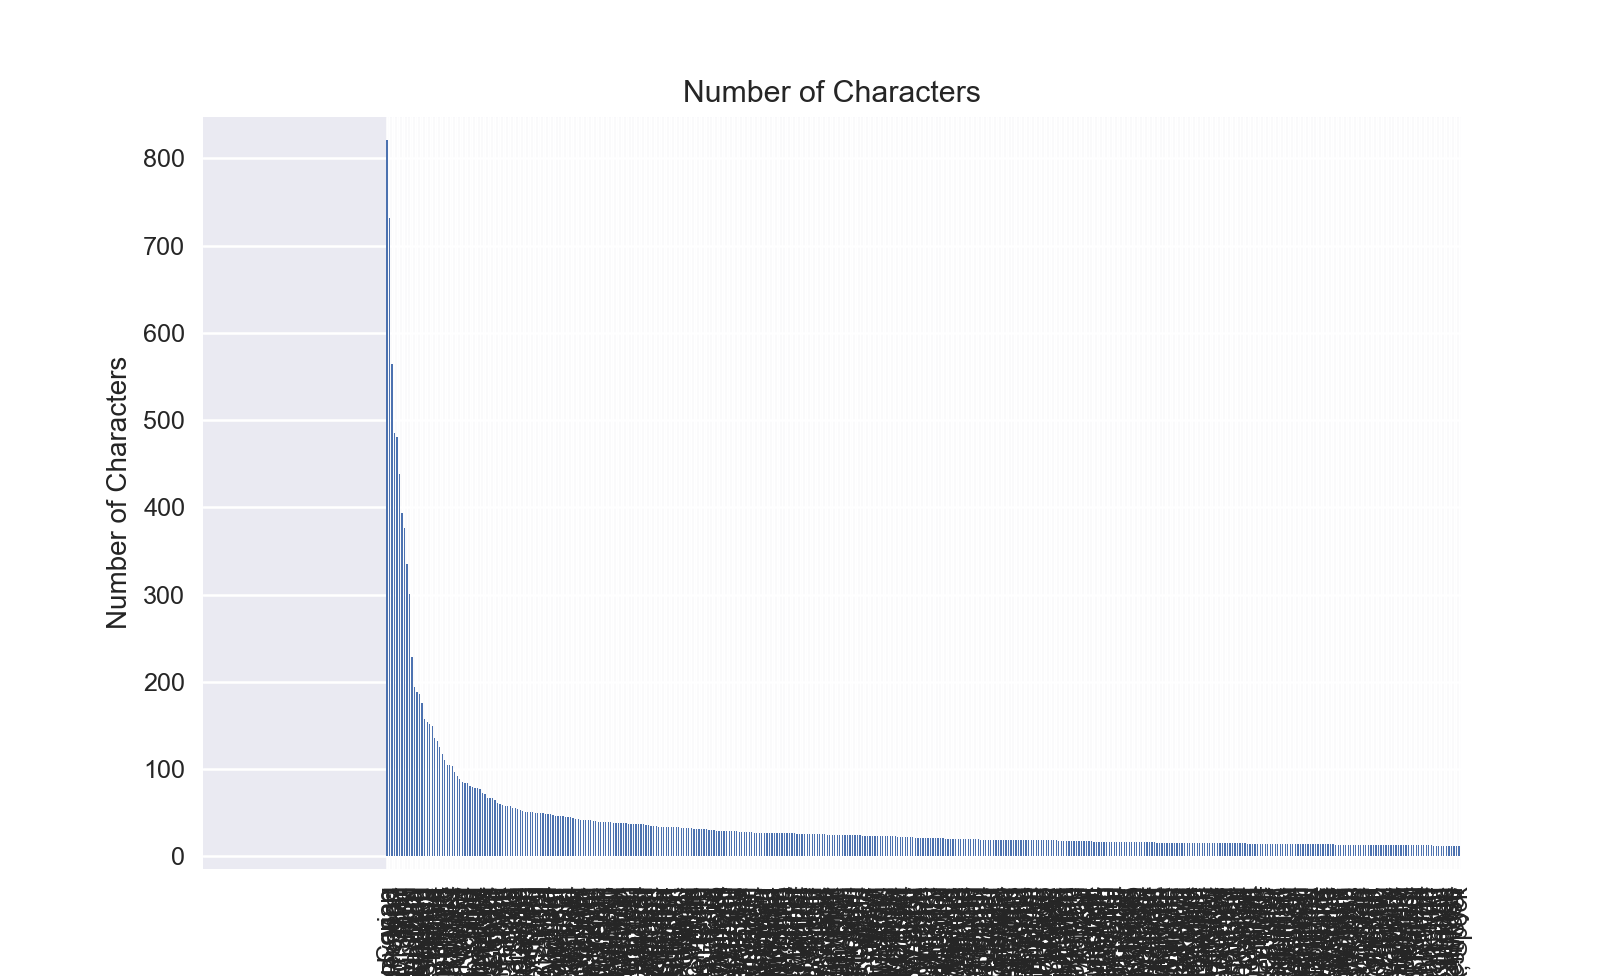

In [22]:
plot_story_per_category(comic['story_characters'], "Number of Characters", 
                         "characters", 
                         "Number of Characters", 
                         500,
                         "story_chatacter.png")

## Sum Comics grouped by title 

In [23]:
comic.groupby('story_title').sum()

,brand_year_began,brand_issue_count,issue_page_count,publisher_year_began,publisher_year_ended,publisher_series_count,series_year_began,serie_year_ended,story_page_count
story_title,,,,,,,,,
""" ...I Was A Little Angry """,2001.0,12519,36.0,1939,NaN,7727,2005,2005.0,22.00
""" I reckon by now you've heard of Alvin Maker - """,2006.0,65,174.0,1939,NaN,7727,2007,2008.0,22.00
""" My Love Or Storm's Life, Illyana---- Choose!""",1983.0,2640,36.0,1939,NaN,7727,1983,1984.0,1.00
""" Y'know what I like about my life?""",2001.0,12519,244.0,1939,NaN,7727,2007,2007.0,10.00
""" You Don't Recognize Me, Do You? I'm Just Another Guy Named Joe!""",1983.0,2640,36.0,1939,NaN,7727,1982,1994.0,1.00
"""""Boss"" Sarpo, notorious gangleader, has been...""",2001.0,12519,280.0,1939,NaN,7727,2004,NaN,8.00
"""""Father, forgive me, for my sins are many.""""",2012.0,550,32.0,1939,NaN,7727,2013,2014.0,20.00
"""""Hollywood Bride"" Walking Doll""",1951.0,2282,36.0,1939,NaN,7727,1953,1958.0,1.00
"""""I'm ready to go for my first bareback lesson""",1954.0,226,100.0,1939,NaN,7727,1942,1964.0,1.00


## Count comics by story_title and story_feature

In [24]:
comic.groupby('story_title')['story_feature'].count()

story_title
" ...I Was A Little Angry "                                                             1
" I reckon by now you've heard of Alvin Maker - "                                       1
" My Love Or Storm's Life, Illyana---- Choose!"                                         1
" Y'know what I like about my life?"                                                    1
" You Don't Recognize Me, Do You? I'm Just Another Guy Named Joe!"                      1
""Boss" Sarpo, notorious gangleader, has been..."                                       1
""Father, forgive me, for my sins are many.""                                           1
""Hollywood Bride" Walking Doll"                                                        1
""I'm ready to go for my first bareback lesson"                                         0
""Next Tuesday is Tubs' Birthday!"                                                      1
""Who's that lady?" you ask?"                                                           

## Bahavior of publishers numbers

<IPython.core.display.Javascript object>


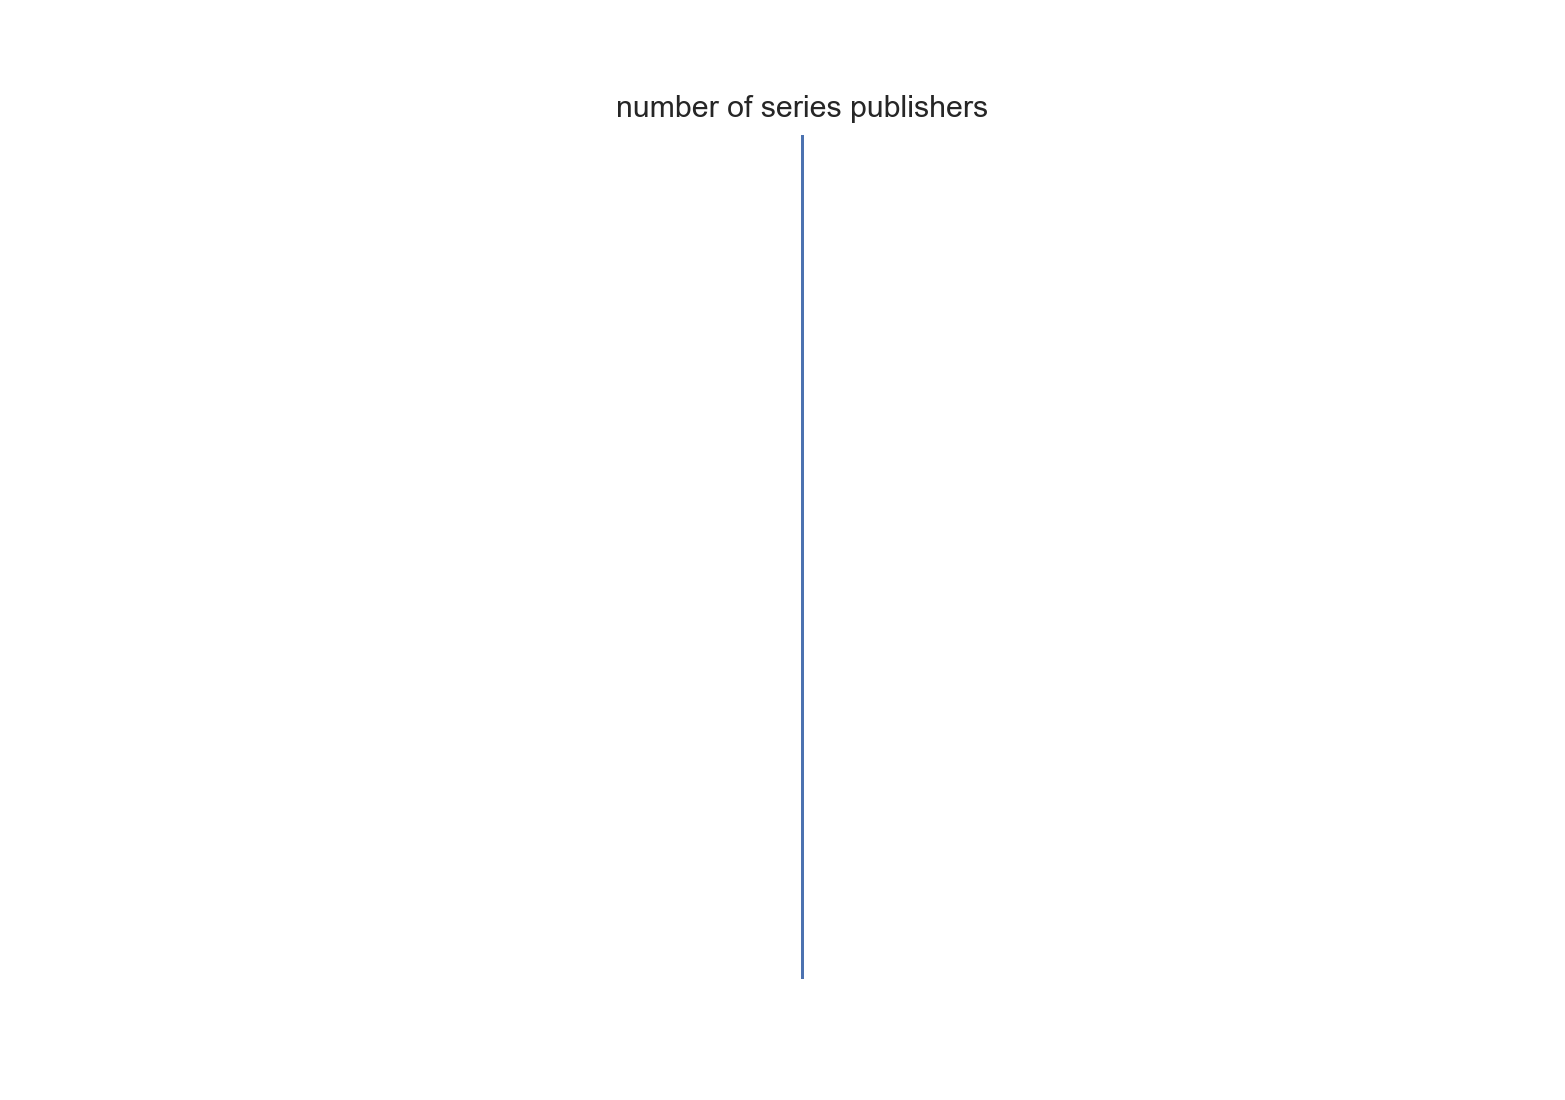

In [25]:
plot_story_per_category(comic['publisher_name'], 
                         "number of series publishers", 
                         "publishers name", 
                         "Number of publishers", 2000,
                         "comic_publishers.png")

In [26]:
df = pd.DataFrame(comic['publisher_year_began'].value_counts(), columns=['publisher_name'])
df['date'] = df.index
df.head()


,publisher_name,date


# World Cloud

In [27]:
script = " ".join(comic['story_script'].values.astype(str))

Concatenate all the scripts in one String

In [28]:
concat_script = " ".join([word for word in script.split()
                            if '?' not in word
                                and not word.startswith('nan')
                            ])

In [30]:
wc = WordCloud(background_color="white", font_path="/Library/Fonts/Verdana.ttf", stopwords=STOPWORDS, width=1800,
                      height=140)
wc.generate(concat_script)
plt.imshow(wc)
plt.axis("off")
plt.savefig('script.png', dpi=300)